# EDA Cleaned Phenology Data (i.e. complete information on genus and species)

In [10]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import json

## Reading data

In [11]:
cwd =os.getcwd()
p_cwd = Path(cwd).parent.absolute()

In [12]:
df = pd.read_csv(os.path.join(p_cwd, "data","clean_phen_data.csv"))

In [13]:
df.head()

,s_id,provider_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,cult_season,affected_flag,qc_flag,qc_ori_flag
0,5144,101,11.23330,53.9833,5,0,2390300,Tilia,Tilia platyphyllos,60,1951,2,1951-01-02,0,0,0,0
1,2255,101,8.96667,51.3333,250,256,1360100,Corylus,Corylus avellana,60,1951,5,1951-01-05,0,0,0,0
2,1967,101,9.00000,49.6667,220,221,1360100,Corylus,Corylus avellana,60,1951,6,1951-01-06,0,0,0,0
3,4014,101,10.93330,49.8000,260,242,1360100,Corylus,Corylus avellana,60,1951,7,1951-01-07,0,0,0,0
4,512,101,10.13330,52.0167,120,122,1600100,Galanthus,Galanthus nivalis,60,1951,10,1951-01-10,0,0,0,0


In [14]:
#provider_id gives information on the Phenological Network
df['provider_id'].unique()
#the column 'provider_id' will be dropped in the machine learning analysis

array([101,  99, 102])

In [15]:
# affected_flag provides information on exception events that may have affected the observation
df.groupby(by='affected_flag').size()

affected_flag
0    10793115
1         279
dtype: int64

In [16]:
# quality control flag
df.groupby(by='qc_flag').size()
#the column 'qc_flag' will be dropped in the machine learning analysis

qc_flag
0    10793394
dtype: int64

In [17]:
# another quality control flag
df.groupby(by='qc_ori_flag').size()
#the column 'qc_ori_flag' will be dropped in the machine learning analysis

qc_ori_flag
0    10793394
dtype: int64

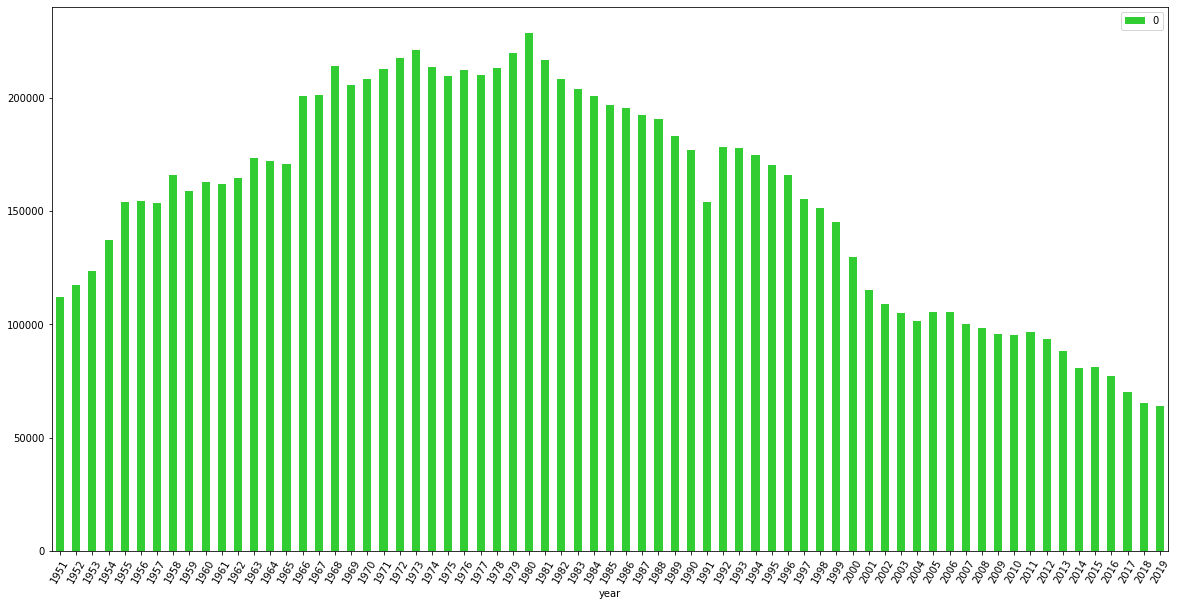

In [18]:
# Plot of the observations per year
obs_plot = pd.DataFrame(df.groupby(by='year').size()).plot.bar(figsize=(20,10), color='limegreen', rot=60)
plt.savefig(os.path.join(p_cwd, "output","images","observations_plot.jpg"), dpi=300,
        orientation='portrait')

## Pheno phases

In [19]:
#counting the number of obs available for each pheno phase
df_phases_num = pd.DataFrame(df.groupby(by='phase_id').size().sort_values(ascending=False))

In [20]:
df_phases_num

,0
phase_id,
60,3544673
87,1120446
10,1066906
11,1030945
100,575525
205,568463
286,521895
0,519905
65,438264


In [21]:
# list of the pheno phases represented in the dataset
phases_list = df_phases_num.index.tolist()

In [22]:
phases_list

[60,
 87,
 10,
 11,
 100,
 205,
 286,
 0,
 65,
 69,
 51,
 31,
 95,
 111,
 7,
 61,
 85,
 75,
 250,
 161,
 151,
 81,
 97]

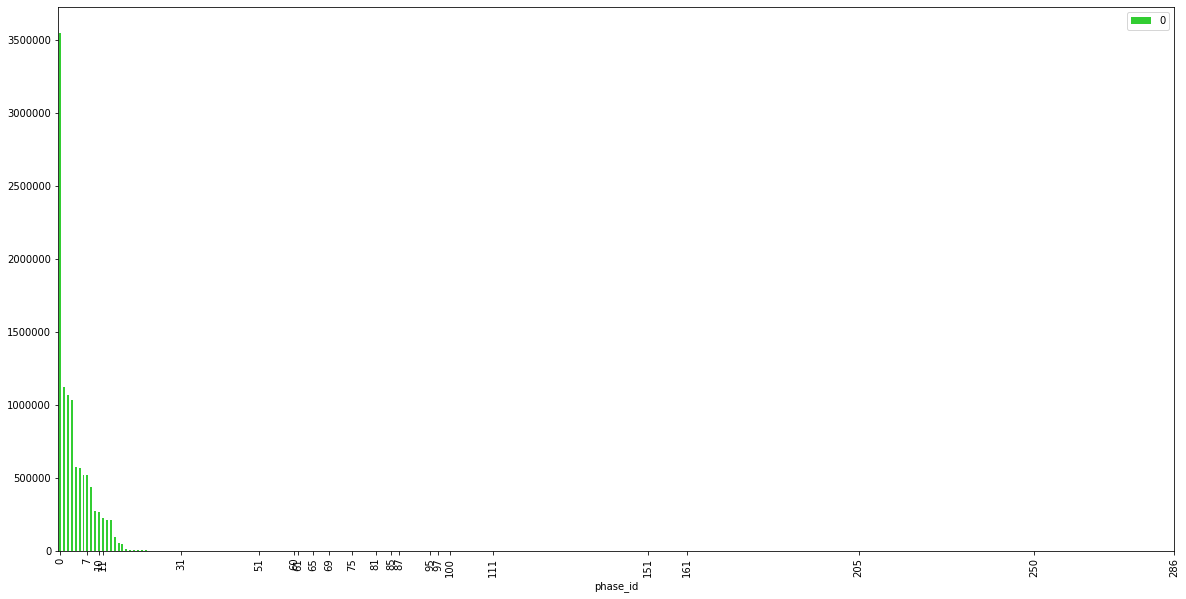

In [23]:
phases_plot = df_phases_num.plot.bar(use_index= True, xticks = phases_list, figsize=(20,10), color='limegreen')

In [24]:
plt.savefig(os.path.join(p_cwd, "output","images","phases_plot.jpg"), dpi=300,
        orientation='portrait')

<Figure size 432x288 with 0 Axes>

In [25]:
df_phases = pd.read_csv(os.path.join(p_cwd, "data","other_data","pep725_phase.csv"), sep=';', index_col=False)

In [26]:
df_phases

,phase_id,bbch,description,lastmod
0,0,0.0,Dry seed (seed dressing takes place at stage 0...,2017-03-31 06:40:00
1,1,1.0,"Beginning of seed imbibition, P, V: Beginning ...",2017-03-31 06:40:00
2,3,3.0,"Seed imbibition complete, P, V: End of bud swe...",2017-03-31 06:40:00
3,5,5.0,"Radicle (root) emerged from seed, P, V: Perenn...",2017-03-31 06:40:00
4,6,6.0,"Elongation of radicle, formation of root hairs...",2017-03-31 06:40:00
...,...,...,...,...
103,218,NaN,autumnal leaf fall: >=80% of leaves fallen,2017-03-31 06:40:00
104,223,NaN,Leaf unfolding (>=50%),2017-03-31 06:40:00
105,250,NaN,"Grapevine bleeding, pruned grapes start to los...",2017-03-31 06:40:00
106,251,NaN,sap exudation (birch trees),2021-01-20 11:30:00


In [27]:
df_phases.dtypes

phase_id         int64
bbch           float64
description     object
lastmod         object
dtype: object

In [28]:
df_phases.head()

,phase_id,bbch,description,lastmod
0,0,0.0,Dry seed (seed dressing takes place at stage 0...,2017-03-31 06:40:00
1,1,1.0,"Beginning of seed imbibition, P, V: Beginning ...",2017-03-31 06:40:00
2,3,3.0,"Seed imbibition complete, P, V: End of bud swe...",2017-03-31 06:40:00
3,5,5.0,"Radicle (root) emerged from seed, P, V: Perenn...",2017-03-31 06:40:00
4,6,6.0,"Elongation of radicle, formation of root hairs...",2017-03-31 06:40:00


In [29]:
df_phases.set_index('phase_id', inplace=True)

In [30]:
phases_dict={}

for phase in phases_list:
    phase_description = df_phases._get_value(phase, "description")
    phases_dict.update({phase:phase_description})
    
print(phases_dict)

{60: 'Beginnin of flowering: first flowers open (sporadically)', 87: 'Fruit begins to soften (species with fleshy fruit), fruit ripe for picking', 10: 'G: First true leaf emerged from coleoptile, D, M: Cotyledons completely unfolded, P: First leaves separated', 11: 'First true leaf, leaf pair or whorl unfolded, P: First leaves unfolded', 100: 'start of harvest', 205: 'autumnal colouration >=50%', 286: 'first ripe fruits', 0: 'Dry seed (seed dressing takes place at stage 00), P, V: Winter dormancy or resting period', 65: 'Full flowering: 50% of flowers open, first petals may be fallen', 69: 'End of flowering: fruit set visible', 51: 'Inflorescence or flower buds visible, G: Beginning of heading', 31: 'Stem (rosette) 10% of final length (diameter), G: 1 node detectable', 95: '50% of leaves fallen', 111: 'first cut for silage winning', 7: 'G: Coleoptile emerged from caryopsis, D, M: Hypocotyl with cotyledons or shoot breaking through seed coat, P, V: Beginning of sprouting or bud breaking

In [31]:
out_file = os.path.join(p_cwd, "output","printouts","phases_dictionary.json")
with open (out_file, 'w') as f:
    json.dump(phases_dict, f, indent=4)


## Stations

In [41]:
lst_stations = sorted(set(df['s_id'].to_list()))
print(len(lst_stations))

6773


In [42]:
# observations per station
df_lst = []
for station in lst_stations:
    obs = len(df[df['s_id']==station])
    oldest = df[df['s_id']==station]['year'].min()
    newest = df[df['s_id']==station]['year'].max()
    time_frame= "{oldest}-{newest}".format(oldest=oldest, newest=newest)
    df_lst.append((station, obs, time_frame))  

In [43]:
df_station_info = pd.DataFrame(df_lst, columns=['s_id', 'total_obs', 'time_frame'])

In [45]:
df_station_info.to_csv(os.path.join(p_cwd, "output", "printouts", "stations_info.csv"), index=0)

In [33]:
file_path = os.path.join(p_cwd, "data","other_data","pep725_stations.csv")

In [34]:
df_stations = pd.read_csv(file_path, sep=';', encoding='utf-8')

In [35]:
len(df_stations)

26597

In [36]:
df_stations_de = df_stations.loc[df_stations['s_id'].isin(lst_stations)]

In [37]:
len(df_stations_de)

6773

In [38]:
df_stations_de.head(10)

,s_id,provider_id,country_id,nat_id,lon,lat,alt,alt_dem,qc_flag,name,lastmod
0,1,101,1,11110000,9.43333,54.7667,25,34,1,"Flensburg, kreisfreie Stadt Flensburg",2017-03-14 12:42:00
1,2,101,1,11120000,10.15000,54.4000,25,31,1,Kiel-Pries,2017-03-14 12:44:00
2,3,101,1,11120001,10.15000,54.3333,29,29,1,Kiel-Düsternbrook,2017-03-14 12:44:00
3,4,101,1,11120002,10.05000,54.3167,30,32,1,Kiel-Mettenhof,2017-03-14 12:44:00
4,5,101,1,11130000,10.68330,53.8833,10,29,1,Lübeck-Schlutup,2017-03-14 12:45:00
5,6,101,1,11130001,10.71670,53.8333,13,11,1,Lübeck-Sankt Lorenz (Nord),2017-03-14 12:45:00
6,7,101,1,11130002,10.63330,53.8333,10,16,1,Lübeck-Sankt Jürgen,2017-03-14 12:45:00
7,8,101,1,11140000,9.98333,54.0833,25,19,1,"Neumünster, kreisfreie Stadt Neumünster",2017-03-14 12:45:00
8,9,101,1,11311140,9.70000,54.4333,25,32,1,Ascheffel,2017-03-14 12:45:00
9,10,101,1,11311180,9.70000,54.3333,15,15,1,Borgstedt b. Rendsburg,2017-03-14 12:45:00


In [91]:
df_stations_de['nat_id'].unique()

array(['11110000', '11120000', '11120001', ..., '19031', '19101', '15993'],
      dtype=object)

In [92]:
df_stations_de.drop(['provider_id', 'country_id', 'nat_id', 'alt', 'alt_dem',
                  'qc_flag', 'lastmod'], axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [93]:
df_stations_de

,s_id,lon,lat,name
0,1,9.43333,54.7667,"Flensburg, kreisfreie Stadt Flensburg"
1,2,10.15000,54.4000,Kiel-Pries
2,3,10.15000,54.3333,Kiel-Düsternbrook
3,4,10.05000,54.3167,Kiel-Mettenhof
4,5,10.68330,53.8833,Lübeck-Schlutup
...,...,...,...,...
21511,21528,14.06670,52.5500,Buckow/M?rkische Schweiz
21512,21529,12.10000,54.1000,Rostock-Gehlsdorf
21513,21530,12.23330,51.8000,Dessau-S?d
21514,21531,10.40000,50.7500,He?les


In [94]:
df_stations_de.to_csv(os.path.join(p_cwd, "data", "de_phen_stations_from_df.csv"), index=False)

## Genera and species

In [106]:
df_gen_spec = pd.DataFrame(df.groupby(by=['genus', 'species']).size().sort_values(ascending=False))

In [109]:
df_gen_spec.rename(columns={0:'count'})

,,count
genus,species,
Hordeum,Hordeum vulgare,716812
Aesculus,Aesculus hippocastanum,599214
Solanum,Solanum tuberosum,541279
Triticum,Triticum aestivum,456213
Prunus,Prunus cerasus,452002
Malus,Malus domestica,428626
Prunus,Prunus domestica,394717
Ribes,Ribes uva-crispa L.,392202
Quercus,Quercus robur,391345


In [111]:
df_gen_spec.to_csv(os.path.join(p_cwd, "output", "printouts", "gen_spec_count.csv"))

## Preparing the dataset for feature engineering

In [95]:
# Dropping the columns not relevant for the machine learning work
df.drop(['provider_id','qc_flag', 'qc_ori_flag'], axis=1, inplace=True)

In [96]:
df.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,cult_season,affected_flag
0,5144,11.23330,53.9833,5,0,2390300,Tilia,Tilia platyphyllos,60,1951,2,1951-01-02,0,0
1,2255,8.96667,51.3333,250,256,1360100,Corylus,Corylus avellana,60,1951,5,1951-01-05,0,0
2,1967,9.00000,49.6667,220,221,1360100,Corylus,Corylus avellana,60,1951,6,1951-01-06,0,0
3,4014,10.93330,49.8000,260,242,1360100,Corylus,Corylus avellana,60,1951,7,1951-01-07,0,0
4,512,10.13330,52.0167,120,122,1600100,Galanthus,Galanthus nivalis,60,1951,10,1951-01-10,0,0


In [97]:
#Decided to remove the observations with an affected flag
df_fin = df[df['affected_flag'] != 1]

In [98]:
df_fin.head()
len(df_fin) 
#checking that len(df_fin) is the same as the number of obs with affected flag=0

10793115

In [99]:
df_fin.drop('affected_flag', axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [100]:
df_fin.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,cult_season
0,5144,11.23330,53.9833,5,0,2390300,Tilia,Tilia platyphyllos,60,1951,2,1951-01-02,0
1,2255,8.96667,51.3333,250,256,1360100,Corylus,Corylus avellana,60,1951,5,1951-01-05,0
2,1967,9.00000,49.6667,220,221,1360100,Corylus,Corylus avellana,60,1951,6,1951-01-06,0
3,4014,10.93330,49.8000,260,242,1360100,Corylus,Corylus avellana,60,1951,7,1951-01-07,0
4,512,10.13330,52.0167,120,122,1600100,Galanthus,Galanthus nivalis,60,1951,10,1951-01-10,0


In [101]:
df_fin.to_csv(os.path.join(p_cwd, "data", "phen_data_ml.csv"), index=False)